<div style="width: 80%;">

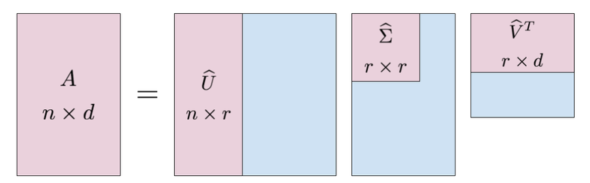
<div style="clear: both"></div>
<br>

<div style="font-size: 20pt; float: left;">Anwendungen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">FS 2023</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Cédric Huwyler</div>
</div>
<br>


# Mini-Challenge 2 zum Thema *Lineare Regression*

In der zweiten Mini-Challenge setzen Sie sich mit einem altbekannten Problem der Mathematik auseinander:

<div class="alert alert-block alert-success">
Gegeben sei eine Anzahl von Punkten in einem Koordinatensystem - wie kann eine Gerade gefunden werden, die diese Punkte mit einer möglichst geringen Abweichung beschreibt?
</div>

Ein Lösungsansatz dazu heisst *Lineare Regression*. In dieser Mini-Challenge werden Sie sich über überbestimmte Gleichungssysteme an die lineare Regression herantasten und die damit verbundene lineare Algebra kennenlernen.
Das Ziel dieser Übung ist nicht ein Verständnis der Anwendungsgebiete der linearen Regression (siehe dazu die Kompetenz *Lineare und Logistische Regression*), sondern ein fundiertes Verständnis der darin verwendeten Mathematik. Wenn Sie diese Übung sauber bearbeitet haben, sind sie dazu bereit, kompliziertere Verfahren wie neuronale Netze mathematisch zu verstehen, die wesentliche Komponenten der linearen Regression einsetzen.

**Musterlösung:**

Zu dieser Minichallenge existiert (bewusst) keine Musterlösung. Du kannst sie aber gerne zur Durchsicht und Kommentierung uns entweder in einer der Sprechstunden vorstellen oder zuschicken (cedric.huwyler@fhnw.ch).

Du benötigst für diese Übung nur die folgenden Pakete. Verwende bitte ausschliesslich diese Pakete zur Lösung der Aufgabe. Möchtest du andere Pakete laden, die die Lösung nicht direkt stark vereinfachen, so ist das erlaubt (z.B. zur Visualisierung).

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Aufgabe 1: Überbestimmte lineare Gleichungssysteme

Du hast in *Grundlagen der linearen Algebra* lineare Gleichungssysteme sehr genau studiert. In dieser Aufgabe repetierst du noch einmal dein Wissen und setzst es konkret mit numpy und matplotlib um.

### Teilaufgabe a)

Gegeben sei das lineare Gleichungssystem *(A)*

$$
\left|
\begin{eqnarray}
3x_1 - x_2 &=& 7 \\
2x_1 + 3x_2 &=& 1 \\
\end{eqnarray}
\right|.
$$

Zerlege dieses Gleichungssystem in eine Koeffizientenmatrix $A$ und einen Spaltenvektor $\vec{b}$. Erstelle ebenfalls die *erweiterte Koeffizientenmatrix* $\hat{A}$ mit `np.hstack`. **Zusätzlich:**

1. Argumentiere mit den Rängen von $A$ und $\hat{A}$, dass das Gleichungssystem genau eine Lösung hat. Benutze hier auch Kommentare in Markdown!
2. Bestimme diese Lösung mittels der Inversen von $A$ und gebe sie aus.
3. Stelle ausserdem das Gleichungssystem mit matplotlib graphisch dar.

In [53]:
# Matrizen und Vektor definieren
A = np.array([
    [3, -1],
    [2, 3]
])

b = np.array([
    [7],
    [1]
])
Â = np.hstack((A, b))
display(A, b, Â)

array([[ 3, -1],
       [ 2,  3]])

array([[7],
       [1]])

array([[ 3, -1,  7],
       [ 2,  3,  1]])

In [54]:
# 1. Argumentiere mit den Rängen von $A$ und $\hat{A}$, dass das Gleichungssystem genau eine Lösung hat. Benutze hier auch Kommentare in Markdown!
A_rang = np.linalg.matrix_rank(A)
Â_rang = np.linalg.matrix_rank(Â)
display(A_rang, Â_rang)

2

2

die beiden Ränge der Matrizen sind gleich, somit hat das Gleichungssystem genau eine Lösung.

In [55]:
# 2. Bestimme diese Lösung mittels der Inversen von $A$ und gebe sie aus.
x = np.linalg.inv(A) @ b
display(x)

array([[ 2.],
       [-1.]])

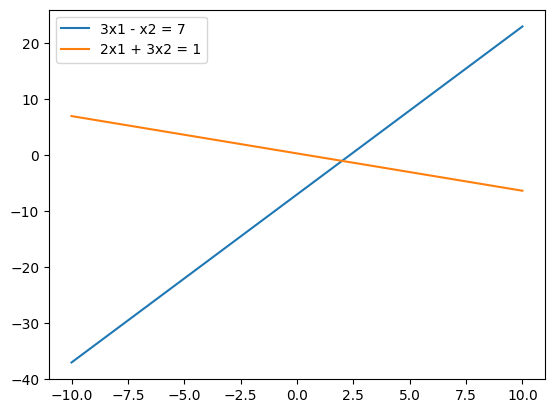

In [56]:
# 3. Stelle ausserdem das Gleichungssystem mit matplotlib graphisch dar.
x1 = np.linspace(-10, 10, 100)
x2 = (7 - 3 * x1) / -1
x3 = (1 - 2 * x1) / 3
plt.plot(x1, x2, label='3x1 - x2 = 7')
plt.plot(x1, x3, label='2x1 + 3x2 = 1')
plt.legend()
plt.show()


### Teilaufgabe b)

Nun fügen wir eine weitere Gleichung zum System hinzu und nennen dieses System im Folgenden *(B)*:

$$
\left|
\begin{eqnarray}
3x_1 - x_2 &=& 7 \\
2x_1 + 3x_2 &=& 1 \\
6x_1 - 2x_2 &=& -1 \\
\end{eqnarray}
\right|.
$$

Bestimme auch hier wieder die Ränge von $A$ und $\hat{A}$. Wie hat sich die Lösungsmenge des Gleichungssystems durch die zusätzlich beigefügte Gleichung verändert? Stelle auch dieses Gleichungssystem wieder graphisch dar. Was stellst du fest?

In [57]:
# neue Zeile hinzufügen
new_row = np.array([
    [6, -2]
])
B = np.vstack((A, new_row))
# neues Element zu b hinzufügen
new_element = np.array([
    [-1]
])
b_hat = np.vstack((b, new_element))

B_hat = np.hstack((B, b_hat))
display(B, b_hat, B_hat)


array([[ 3, -1],
       [ 2,  3],
       [ 6, -2]])

array([[ 7],
       [ 1],
       [-1]])

array([[ 3, -1,  7],
       [ 2,  3,  1],
       [ 6, -2, -1]])

In [58]:
B_rang = np.linalg.matrix_rank(B)
B_hat_rang = np.linalg.matrix_rank(B_hat)
display(B_rang, B_hat_rang)

2

3

Die Ränge sind nicht mehr gleich, somit hat das Gleichungssystem keine Lösung.

## Aufgabe 2: Approximative Lösungen

In Aufgabe 1 hast du versucht, das Gleichungssystem *(B)*

$$
\left|
\begin{eqnarray}
3x_1 - x_2 &=& 7 \\
2x_1 + 3x_2 &=& 1 \\
6x_1 - 2x_2 &=& -1 \\
\end{eqnarray}
\right|
$$

zu lösen und hast vermutlich erkannt, dass keine Lösung existieren kann. Für einige Anwendungen ist es trotzdem interessant, eine Lösung zu finden, die das Problem nicht genau, aber so gut wie möglich (approximativ) löst. Dies kannst du im Folgenden versuchen zu tun.

Du hast in *Grundlagen der linearen Algebra* gesehen, dass sich ein lineares Gleichungssystem als $A \vec{x} = \vec{b}$ formulieren lässt. Wir 'entspannen' im Folgenden das `=` durch ein `≈` (fast gleich) und erwarten nun nur noch dass $A \vec{x}$ ungefähr gleich $\vec{b}$ ist:

$$A \vec{x} ≈ \vec{b}.$$

Wir möchten nun $\vec{x}$ so wählen, dass die (vektorielle) Differenz $A\vec{x} - \vec{b}$ möglichst klein, also möglichst nahe beim Nullvektor ist. Dabei beschränken wir uns der Einfachheit halber auf den Betrag dieser vektoriellen Differenz und definieren die approximative Lösung des Problems folgendermassen:

$$\hat{\vec{x}} = \arg\min_{\vec{x} \, \in \, R^{2}} |A \vec{x} - \vec{b}|. $$

$\hat{\vec{x}}$ ist also der Vektor, der den Betrag $|A \vec{x} - \vec{b}|$ minimiert.

### Teilaufgabe a)

Gegeben seien die Vektoren

$$\boldsymbol{x} \in \left\{ \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \begin{pmatrix} 0.8 \\ -1 \end{pmatrix}, \begin{pmatrix} 2 \\ -1 \end{pmatrix} \right\}$$ 

Welcher der Vektoren führt zum kleinsten Wert von $|A \vec{x} - \vec{b}|$, löst also das Gleichungssystem 'am besten'? Antworte auch in Markdown.

In [59]:
# A und b aus Aufgabe 1
# x-Vektoren definieren
x1 = np.array([
    [0],
    [1]
])
x2 = np.array([
    [0.8],
    [-1]
])
x3 = np.array([
    [2],
    [-1]
])
# Betrag der Differenz berechnen
diff1 = np.linalg.norm(A @ x1 - b)
diff2 = np.linalg.norm(A @ x2 - b)
diff3 = np.linalg.norm(A @ x3 - b)
# Ergebnisse ausgeben
display(diff1, diff2, diff3)


8.246211251235321

4.326661530556787

0.0

<hr>
<i>Ihre Antwort in Markdown</i>
<hr>
Der erste Vektor x3 führt zum kleinsten Wert von |A x - b|, also löst er das Gleichungssystem am besten.

### Teilaufgabe b)

Nun möchten wir diesen Differenzbetrag systematisch minimieren. Im Folgenden geben wir dir eine systematische Liste $X$ von möglichen Lösungsvektoren $\vec{x}$ vor:

In [60]:
n = 1000
xmin = -10
xmax = 10
X = np.empty( shape=(2,n**2) )
X1 = np.linspace( xmin, xmax, n )
X2 = np.linspace( xmin, xmax, n )
for i in range( n ):
    for j in range( n ):
        X[:,n*i+j] = np.array([X1[i],X2[j]])
        
print( "Dimensionen von X: {}".format( X.shape ) )

Dimensionen von X: (2, 1000000)


$X$ ist also eine Aneinanderreihung von 1'000'000 verschiedenen Spaltenvektoren mit zwei Zeilen. Finde den Vektor, der das Gleichungssystem am besten annähert und gib diesen Vektor, seine Position in $X$ und den Betrag von $|A\vec{x}-\vec{b}|$ für diesen Vektor aus.

**Hinweis:** 
* Du kannst $A$ direkt mit $X$ multiplizieren (statt mit jedem einzelnen Vektor `X[:,i]`, prüfe warum) 
* `np.linalg.norm( .., axis=.. )` reduziert mit `axis=0` alle Spalten(-vektoren) und mit `axis=1` alle Zeilen(-vektoren) auf ihren Betrag
* .. + ein weiterer Befehl aus der numpy-Trickkiste.

In [61]:
# DEIN CODE (~4 Zeilen)
# AX berechnen
AX = np.dot(A, X)

# Differenz von AX-b für jeden Vektor in X berechnen
diff = np.linalg.norm(AX - b, axis=0)

# zweite Version für die Differenz von AX-b
diffs = np.linalg.norm(AX-np.reshape(b, (2,1)), axis=0)

# Minimum der Differenz finden (Index)
min_index = np.argmin(diff)

# den Vektor mit dem kleinsten Betrag (Fehler) aus X ausgeben
min_x = X[:, min_index]
min_norm = np.linalg.norm(A @ min_x - b)

# Ergebnisse ausgeben
display(diff, diffs)

print("Der Vektor, der das Gleichungssystem am besten approximiert, ist: ", min_x)
print("Seine Position in X ist: ", min_index)
print("Der Betrag von |Ax - b| für diesen Vektor ist: ", min_norm)



array([57.70615219, 57.66245714, 57.61879851, ..., 50.58937933,
       50.64226143, 50.69516742])

array([57.70615219, 57.66245714, 57.61879851, ..., 50.58937933,
       50.64226143, 50.69516742])

Der Vektor, der das Gleichungssystem am besten approximiert, ist:  [ 1.99199199 -0.99099099]
Seine Position in X ist:  599450
Der Betrag von |Ax - b| für diesen Vektor ist:  8.454223578705566


Stelle nun die gefundene Lösung graphisch dar. Erweitere dazu den Code vom Schluss der Teilaufgabe 1c) um eine passende Zeile.

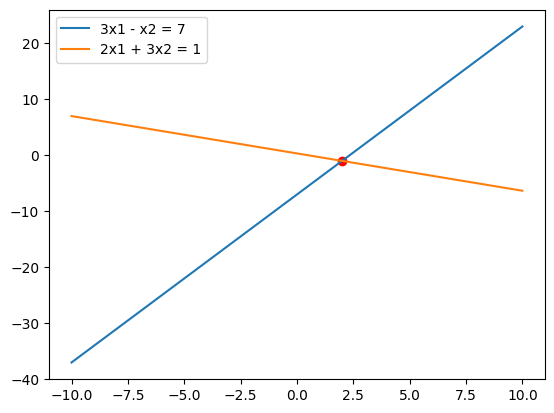

In [62]:
# DEIN CODE
# Code aus Teilaufgabe 1b)
x1 = np.linspace(-10, 10, 100)
x2 = (7 - 3 * x1) / -1
x3 = (1 - 2 * x1) / 3
plt.plot(x1, x2, label='3x1 - x2 = 7')
plt.plot(x1, x3, label='2x1 + 3x2 = 1')
plt.legend()

# neue Zeile für die gefundene Lösung aus 2b)
plt.scatter( min_x[0], min_x[1], color='red' )
plt.show()


### Beobachtung

Der Fehler $|f(\vec{x})-\vec{b}|$ mit $f(\vec{x}) = A\vec{x}$ lässt sich in der euklidischen Norm als *Summe von Quadraten* schreiben:

$$ |f(\vec{x})- \vec{b}| = \sqrt{ (f(\vec{x})_1 - b_1 )^2 + (f(\vec{x})_2 - b_2 )^2 }. $$

Wenn wir in einem dreidimensionalen Plot den Betrag der Differenz als Funktion von $x_1$ und $x_2$, also mit $x=x_1, y=x_2, z=|f(\vec{x})-\vec{b}|$ graphisch darstellen, bekommen wir die folgende Visualisierung:

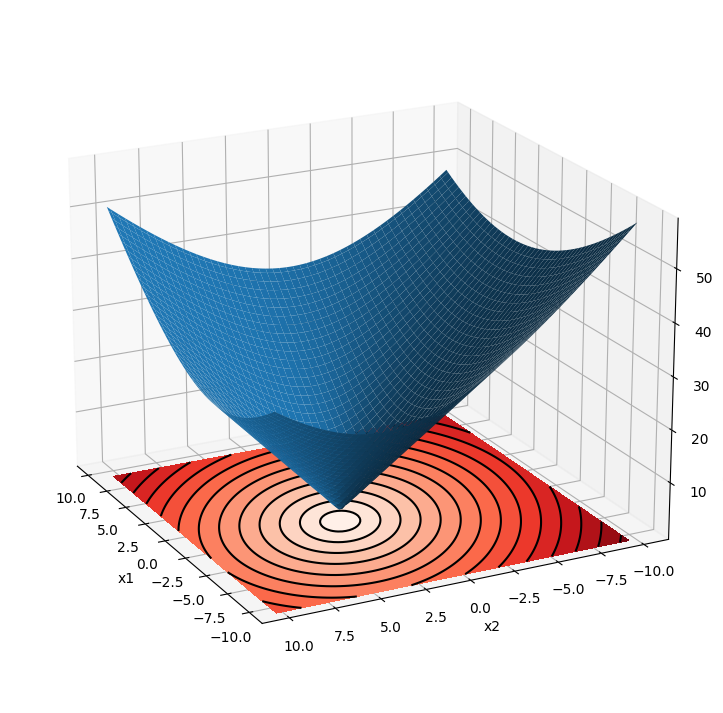

In [63]:
n = 100
Z = np.empty(shape=(n,n))
X1 = np.linspace( xmin, xmax, n )
X2 = np.linspace( xmin, xmax, n )
X,Y = np.meshgrid(X1, X2)
for i in range(n):
    for j in range(n):
        Z[i,j] = np.linalg.norm( A.dot( np.array([[X1[i]],[X2[j]]]) ) - b )

plt.figure( figsize=(15,9) )
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(1,1,1, projection='3d')
ax.view_init(20, 153)
ax.plot_surface(X, Y, Z, linewidth=0.2 )
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Summe der Fehlerquadrate")

cs = ax.contour( X, Y, Z, 15, colors="k", offset=-2 )
ax.contourf( X, Y, Z, 15, zdir='z', offset=-2, cmap="Reds" )

plt.show()

Versuche, den obigen Code zu verstehen.
Das sieht nach einer konvexen Funktion aus, die wir eigentlich sogar analytisch minimieren können sollten! (Es existiert ein eindeutiges Minimum) Dieses Problem werden wir in den Aufgaben 3 und 4 auf zwei verschiedene Arten lösen.

## Aufgabe 3: Die Normalengleichung

Die approximative Lösung eines eigentlich unlösbaren Gleichungssystems, die $|A \vec{x} - \vec{b}|$ minimiert, lässt sich statt mit der obigen Gittersuche auch exakt mittels einer Formel finden. 
Die Matrix $A \in \mathbb{R}^{m\times n}$ hat im Allgemeinen mehr Zeilen als Spalten ($m>n$) und ist daher nicht regulär (nicht invertierbar). Eine invertierbare Matrix ist zwingend quadratisch, wir suchen also eine lineare Transformation, mit der wir eine quadratische Matrix erzeugen können. Da es sich um ein Gleichungssystem mit $n$ Variablen handelt, sollte diese Matrix $n$ Zeilen und $n$ Spalten haben. Die folgende Transformation bietet sich an:

$$A \in \mathbb{R}^{m\times n} \to A^T A \in \mathbb{R}^{n\times n},$$

da $A^T \in \mathbb{R}^{n\times m}$. Multiplizieren wir also das Gleichungssystem $A \vec{x} = \vec{b}$ auf beiden Seiten mit $A^T$ **von links** (Erinnerung: Matrizen kommutieren nicht!), so erhalten wir die sogenannte **Normalengleichung**:

$$ A^T A \vec{x} = A^T \vec{b}.$$

Falls $\left( A^T A \right)^{-1}$ existiert, können wir die Gleichung auf beiden Seiten von links mit $\left( A^T A \right)^{-1}$ multiplizieren und erhalten die Lösung

$$ \vec{x} = \left( A^T A \right)^{-1} A^T \vec{b}.$$

Magisch! Im Folgenden möchten wir diese analytische Lösungsmöglichkeit etwas genauer untersuchen.

### Teilaufgabe a)

Berechne mit der obigen Formel für $\vec{x}$ die approximative Lösung für die beiden Gleichungssysteme *(A)* und *(B)* aus Aufgabe 1:

$$
\left|
\begin{eqnarray}
3x_1 - x_2 &=& 7 \\
2x_1 + 3x_2 &=& 1 \\
\end{eqnarray}
\right|,
$$

und

$$
\left|
\begin{eqnarray}
3x_1 - x_2 &=& 7 \\
2x_1 + 3x_2 &=& 1 \\
6x_1 - 2x_2 &=& -1 \\
\end{eqnarray}
\right|
$$

Kommst du auf ähnliche Lösungen wie in Aufgabe 2b)? (Antwort in Markdown)

In [64]:
# DEIN CODE
# mit der Matrix A aus Aufgabe 1
xA = np.linalg.inv( A.T.dot(A) ).dot( A.T ).dot( b )

# mit der Matrix B aus Aufgabe 1
xB = np.linalg.inv( B.T.dot(B) ).dot( B.T ).dot( b_hat )

In [65]:
display( xA , min_x )

array([[ 2.],
       [-1.]])

array([ 1.99199199, -0.99099099])

<hr>
<i>Deine Antwort in Markdown</i>
<hr>
Wie man beim vorigen Ausdruck gut erkennen kann, sind die beiden Vektoren xA und min_x sehr ähnlich.

### Teilaufgabe b)

Es ist natürlich kein Zufall, dass wir für unsere approximative Berechnung mit Minimierung des Fehlers und für die Lösung mit Normalengleichung sehr ähnliche Resultate erhalten. Diesen Zusammenhang möchten wir hier untersuchen.

Im Folgenden sei die Suche nach dem optimalen zweidimensionalen Vektor, der den Ausdruck $|A\vec{x}-\vec{b}|$ minimiert, als geometrisches Problem dargestellt. Dabei sei $\vec{x} \in \mathbb{R}^2$, $A \in \mathbb{R}^{3\times2}$ und $b \in \mathbb{R}^3$ (3 Gleichungen, 2 Unbekannte). Die Matrixmultiplikation von $A$ mit $\vec{x}$ erzeugt also einen $3$-dimensionalen Vektor. Da $A$ singulär ist, wir aber annehmen dürfen, dass sie einen Rang von $2$ hat, erzeugt die Menge $\{A\vec{x}|\vec{x} \in \mathbb{R}^2\}$ eine Ebene im dreidimensionalen Raum (Bild von $A$). Während die Menge $\{\vec{x}|\vec{x} \in \mathbb{R}^2\}$ gerade die $x$-$y$-Ebene darstellt (mit Richtungsvektoren $\vec{e}_1$ und $\vec{e}_2$), dreht die Anwendung der Matrix $A$ diese Ebene im Allgemeinen von der $x$-$y$-Ebene weg (d.h. die Richtungsvektoren werden zu $A\vec{e}_1$ und $A\vec{e}_2$). Der Vektor $\vec{b}$ ist beliebig zu dieser Ebene orientiert und liegt im Allgemeinen nicht auf der Ebene. Dieser Abschnitt enthält sehr dichte Information. Nimm dir Zeit und versichere dich, dass du alle Sätze genau verstanden hast. Falls dir ein Punkt noch nicht klar ist, frage unbedingt nach.

Bezeichnen wir mit ${\hat{\vec{x}}} = \arg\min_{\vec{x}} |A\vec{x}-\vec{b}|$ den Vektor, der $|A\vec{x}-\vec{b}|$ minimiert und auch $\hat{\vec{b}} = A\hat{\vec{x}}$, dann liegt $\hat{\vec{b}}$ auf der Ebene und wegen

$$|A\hat{\vec{x}} - \vec{b}| = |\hat{\vec{b}} - \vec{b}|$$

suchen wir also die minimale Differenz zwischen $\hat{\vec{b}}$ und $\vec{b}$. Aus *Grundlagen der linearen Algebra* weisst du, dass die kürzeste Verbindung zwischen einem Punkt und einer Ebene gerade der Abstand zum *Fusspunkt* ist, der zusammen mit dem Punkt einen zur Ebene senkrechten Vektor bildet. Der Vektor $\hat{\vec{b}}$ soll also so sein, dass die Differenz $\hat{\vec{b}} - \vec{b}$ senkrecht zur von $\{A\vec{e}_1, A\vec{e}_2\}$ aufgespannten Ebene steht.

<div><img src="mc2_bild1.png" width="600"></div>

Die transformierten Standardbasisvektoren $A\vec{e}_1$ und $A\vec{e}_2$ liegen auf der Ebene und geben uns ausreichend Information über ihre Ausrichtung. Die Differenz $\hat{\vec{b}}-\vec{b}$ steht also senkrecht zur Ebene, falls sie einerseits senkrecht zu $A \vec{e}_1$, andererseits aber auch senkrecht zu $A \vec{e}_2$ steht. Wir können damit das folgende Gleichungssystem aufstellen:

$$
\left|
\begin{eqnarray}
(A\hat{\vec{x}}-\vec{b}) \cdot A\vec{e}_1 &=& 0 \\
(A\hat{\vec{x}}-\vec{b}) \cdot A\vec{e}_2 &=& 0
\end{eqnarray}
\right|
$$

Finde die beste approximative Lösung des nicht-lösbaren Gleichungssystems $(B)$, inde du dieses Gleichungssystem nach $\hat{\vec{x}}$ auflöst und zeige, dass du die gleiche Lösung wie in der Teilaufgabe a) erhältst. Benutze dazu die SymPy-Bibliothek, insbesondere den Befehl `solve()`.

In [66]:
A = np.array( [[3,-1], [2,3], [6,-2]] )
b = np.array( [[7],[1],[-1]] )

x1, x2 = sp.symbols('x1, x2')
x = np.array([[x1],[x2]])

# DEIN CODE
gl1 = (A@x-b).T@A[:,0]
gl2 = (A@x-b).T@A[:,1]
print(gl1[0])
print(gl2[0])
lsg = sp.solve([gl1[0],gl2[0]],[x1,x2])
print(lsg)


49*x1 - 9*x2 - 17
-9*x1 + 14*x2 + 2
{x1: 4/11, x2: 1/11}


### Teilaufgabe c)

Zeige, wie du mit wenigen Umformungen des Gleichungssystems aus Teilaufgabe b) auf die Normalengleichung am Anfang dieser Aufgabe kommen kannst. Damit hast du erklärt, was geometrisch hinter dieser magischen Multiplikation des Gleichungssystems mit $A^T$ steckt!

**Hinweise:** 
* Argumentiere, dass $A^T (A\hat{\vec{x}}-\vec{b}) \in \mathbb{R}^2$ und dass $A^T (A\hat{\vec{x}}-\vec{b}) = \vec{0}$.
* Benutze LaTeX für deine Antwort. Schauen dir dazu die Ausdrücke in den Markdown-Zellen der Aufgabenstellung an, praktisch alle Befehle sind selbsterklärend.

<hr>
<i>Deine Antwort in Markdown</i>
<hr>Die Normalengleichung entsteht aus dem Wunsch, den quadratischen Fehler zwischen den vorhergesagten und den tatsächlichen Ausgaben eines linearen Modells zu minimieren. In unserem Fall suchen wir einen Vektor $\hat{\vec{x}}$, der den Fehler zwischen $A \hat{\vec{x}}$ und $\vec{b}$ minimiert. In anderen Worten, wir suchen den Vektor $\hat{\vec{x}}$, der den Betrag der Differenz $|A \hat{\vec{x}} - \vec{b}|$ minimiert.

Wenn wir $A\hat{\vec{x}}-\vec{b}$ als $\vec{e}$ definieren, suchen wir den Vektor $\hat{\vec{x}}$, der $|\vec{e}|^2$ minimiert. Da der quadratische Fehler $|\vec{e}|^2$ eine konvexe Funktion ist, erreicht er sein Minimum, wenn sein Gradient Null ist. Dies führt uns zur Normalengleichung.

Zunächst erkennen wir, dass der Gradient von $|\vec{e}|^2$ bezüglich $\hat{\vec{x}}$ gleich $2A^T\vec{e}$ ist. Daher setzen wir den Gradienten gleich Null, um das Minimum zu finden:

$$2A^T\vec{e} = 0$$

Da $\vec{e} = A\hat{\vec{x}}-\vec{b}$, können wir dies einsetzen und erhalten:

$$2A^T(A\hat{\vec{x}}-\vec{b}) = 0$$

Da der Vorfaktor 2 nicht Null ist, kann er ohne Änderung der Lösung fallen gelassen werden, und wir erhalten die Normalengleichung:

$$A^T(A\hat{\vec{x}}-\vec{b}) = 0$$

Diese Gleichung besagt, dass das Minimum von $|\vec{e}|^2$ erreicht wird, wenn der Vektor $A\hat{\vec{x}}-\vec{b}$ orthogonal (rechtwinklig) auf dem Raum ist, der von den Spalten von $A$ aufgespannt wird. Diese Orthogonalität ist die geometrische Bedeutung der Multiplikation des Gleichungssystems mit $A^T$.

### Ergänzung

Wir haben oben die Minimierungaufgabe $\vec{x}^* = \arg\min_\vec{x} |A\vec{x} - \vec{b}|$ geometrisch gelöst. Diese Aufgabe kann mit den Mitteln der Differenzialrechnung auch analytisch gelöst werden. Dazu bestimmen wir die Ableitung des Ausdrucks, setzen sie gleich Null und lösen das resultierende Gleichungssystem nach $\vec{x}$ auf. Im allgemeinen multivariaten Fall ist dieses Vorgehen nicht ganz einfach und braucht Wissen über partielle Ableitungen und allenfalls Gradienten. Dieses Wissen kannst du dir in der Kompetenz *Vertiefende Themen der Analysis* aneignen. Dementsprechend ist die analytische Herleitung der Normalengleichung hier kein Prüfungsstoff, trotzdem findest du im Kapitel zu linearer Regression im Skript zur Vollständigkeit einen kurzen Abschnitt dazu.

Die analytische Herleitung ist unter anderem wichtig in den weiterführenden Modulen *Lineare und logistische Regression*, *Multiple lineare Regression*, *Grundlagen des Machine Learning* und *Statistical Learning*. Stelle also sicher, dass du die analytische Herleitung unbedingt einmal nachvollzogen hast!

## Aufgabe 4: Lineare Regression

Bisher haben wir approximative Lösungen für unlösbare lineare Gleichungssysteme bestimmt. Nun wenden wir unseren Lösungsansatz auf ein sehr bekanntes Problem an, die *Lineare Regression*:

<div class="alert alert-block alert-warning">
    
<b>Gegeben:</b>
Ein Satz von Funktionen $f_1, \dots, f_r$ und eine Menge aus $n$ Wertepaaren $\left\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\right\}$ mit $i = 1, .., n$.

<b>Gesucht:</b>
$\lambda_1, \dots, \lambda_r \in \mathbb{R}$, so dass die Funktion $f(x) = \lambda_1 f_1(x) + \dots + \lambda f_r(x)$ den quadratischen Fehler $\left( f(x_1) - y_1 \right)^2 + \dots + \left( f(x_n) - y_n \right)^2$ minimiert.
</div>

Dieses Problem lässt sich als überbestimmtes lineares Gleichungssystem formulieren mit

$$
\begin{equation}
A = \begin{pmatrix}
f_1(x_1) & \dots & f_r(x_1) \\
\vdots & & \vdots \\
f_1(x_n) & \dots & f_r(x_n) \\
\end{pmatrix},
\quad
\vec{v} = \begin{pmatrix}
\lambda_1 \\ \vdots \\ \lambda_r
\end{pmatrix},
\quad
\vec{b} = \begin{pmatrix}
y_1 \\ \vdots \\ y_n
\end{pmatrix}
\end{equation}.
$$

Wir benutzen im Folgenden für die Lösung den Vektor $\vec{v}$ statt $\vec{x}$, um Verwechslungen mit der Koordinate $x$ zu vermeiden.

Mit linearer Regression lässt sich die am besten passende Gerade durch eine Menge von Punkten finden:

<div><img src="mc2_bild2.png" width="600"></div>

### Teilaufgabe a)

Gegeben sei die folgende Liste aus Wertepaaren $(x_i, y_i)$:

In [67]:
w = np.array( 
    [[0.0, 3.8],
     [1.0, 3.9],
     [2.0, 5.4],
     [3.0, 6.5],
     [4.0, 6.1],
     [5.0, 10.5],
     [6.0, 10.3],
     [7.0, 12.6],
     [8.0, 12.1],
     [9.0, 14.4],
     [10.0, 14.7]
     ])
w

array([[ 0. ,  3.8],
       [ 1. ,  3.9],
       [ 2. ,  5.4],
       [ 3. ,  6.5],
       [ 4. ,  6.1],
       [ 5. , 10.5],
       [ 6. , 10.3],
       [ 7. , 12.6],
       [ 8. , 12.1],
       [ 9. , 14.4],
       [10. , 14.7]])

Graphisch dargestellt:

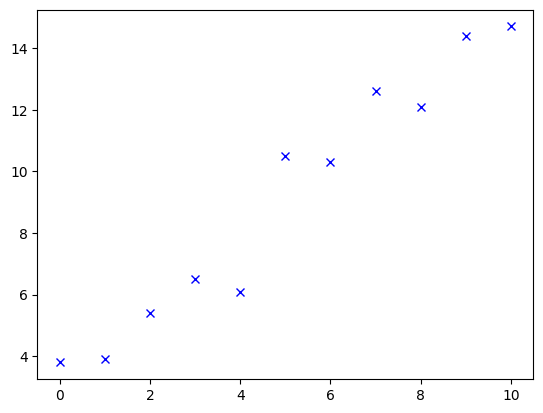

In [68]:
x = w[:,0]
y = w[:,1]
plt.plot( x, y, 'x', color="blue" )
plt.show()

Bestimme die Matrix $A$ und den Spaltenvektor $\vec{b}$ analog zum Schluss der obigen Einführung und gib beide aus.

**Hinweise:** 

* Mit `np.ones(..)` kannst du Matrizen oder Vektoren aus Einsen erstellen.
* Mit `.reshape(-1,1)` kannst du aus einem Zeilenvektor einen Spaltenvektor machen

In [69]:
# DEIN CODE
# Matrix A erstellen
A = np.vstack((np.ones(w.shape[0]), w[:,0])).T
A


array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [70]:
# DEIN CODE
# b Vektor erstellen
b = w[:,1].reshape(-1,1) # die y-Werte aus w sind die zweite Spalte. Mit reshape(-1,1) wird aus einem Zeilenvektor ein Spaltenvektor
b

array([[ 3.8],
       [ 3.9],
       [ 5.4],
       [ 6.5],
       [ 6.1],
       [10.5],
       [10.3],
       [12.6],
       [12.1],
       [14.4],
       [14.7]])

### Teilaufgabe b)

Benutzen Sie die Normalengleichung aus Aufgabe 3 zur Lösung von $A \vec{v} = \vec{b}$ nach $\vec{v} = \begin{pmatrix} q \\ m \end{pmatrix}$. Geben Sie die Lösung aus und stellen Sie die resultierende Regressionsgerade (=beste angenäherte Gerade) graphisch dar.

In [71]:
# DEIN CODE
# mit der Normalengleichung v berechnen
v = np.linalg.inv(A.T @ A) @ A.T @ b
v


array([[3.07272727],
       [1.20909091]])

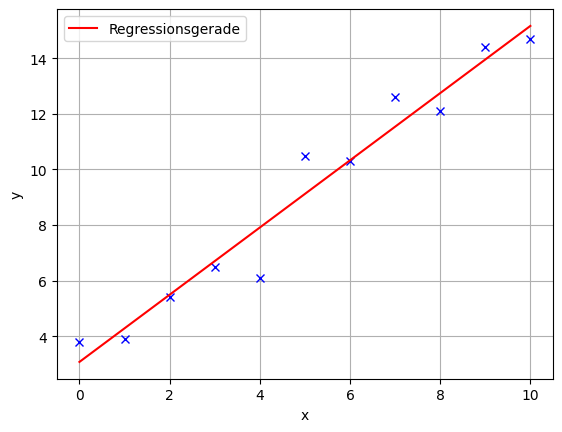

In [72]:
# m und q aus v extrahieren
m, q = v[1], v[0]
m, q
# in einem Plot darstellen
plt.plot( x, y, 'x', color="blue" )
plt.plot( x, m*x + q, color="red", label="Regressionsgerade" )
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Teilaufgabe c)

Berechne den mittleren quadratischen Fehler 

$$\text{MSE} = \frac1n \sum_{i=1}^n \left( f(x_i) - y_i \right)^2$$ 

für die Regressionsgerade aus Teilaufgabe b) und gib ihn aus.

**Hinweis**: Für die Berechnung dieses Fehlers brauchst du keine einzige Summe, sondern nur Matrizenmultiplikationen. Findest du heraus wie?

Die vorhergesagten y-Werte können durch Multiplikation der Matrix $A$ mit dem Vektor $\vec{v}$ erhalten werden, und der MSE kann dann berechnet werden, indem der quadrierte Unterschied zwischen diesen vorhergesagten Werten und $\vec{b}$ genommen und dann der Durchschnitt genommen wird.

In [87]:
# DEIN CODE
# Berechnen der vorhergesagten y-Werte
y_pred = A @ v

# Berechnen des MSE (mittlerer quadratischer Fehler)
mse = np.mean((y_pred - b)**2)
mse

9.121931247020497

## Aufgabe 5: Weitere Anwendungen der Regressionsformel

In dieser Aufgabe werden wir diese einfache Regressionsformel auf eine nicht-lineare Funktion in $x$ anwenden. Dabei ist anzumerken, dass die lineare Regression trotzdem linear bleibt, denn uns interessiert nicht die Funktion selbst sondern die Koeffizienten $\lambda_i$ in der Regressionsformel.

Gegeben sei die folgende Menge aus Wertepaaren:

In [88]:
w = np.array(
    [[-10. , -21.2], [ -9.5, -12.3], [ -9. ,  -4.2], [ -8.5,   3.7], [ -8. ,   8.2], [ -7.5,   9.7],
     [ -7. ,  16.2], [ -6.5,  27.1], [ -6. ,  27.6], [ -5.5,  23.7], [ -5. ,  27.7], [ -4.5,  29.2],
     [ -4. ,  34.7], [ -3.5,  39.1], [ -3. ,  32.7], [ -2.5,  37.4], [ -2. ,  42. ], [ -1.5,  37.5],
     [ -1. ,  35.9], [ -0.5,  35.9], [  0. ,  36.6], [  0.5,  28.4], [  1. ,  30.2], [  1.5,  28.2],
     [  2. ,  21.1], [  2.5,  25.4], [  3. ,  17.1], [  3.5,  16.3], [  4. ,   3.7], [  4.5,  -4.1]]
)

Stelle die Punkte graphisch in einem Koordinatensystem dar:

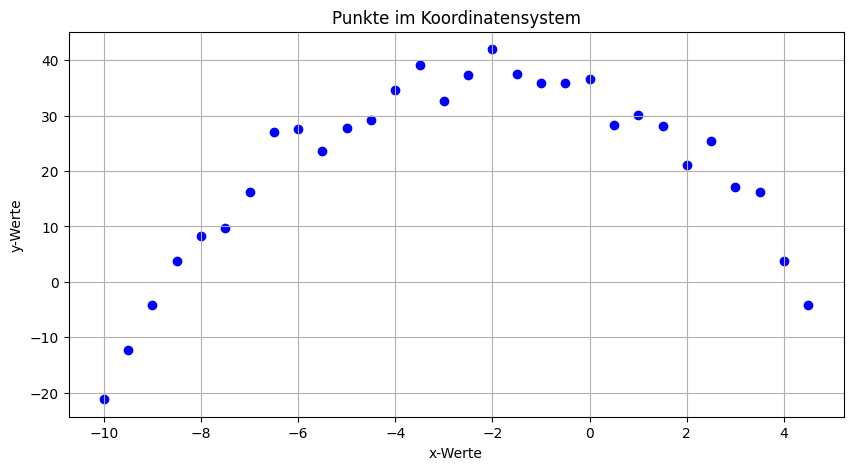

In [89]:
# DEIN CODE
# x und y Werte extrahieren
x = w[:,0]
y = w[:,1]

# Plot erstellen
plt.figure(figsize=(10,5))
plt.scatter(x, y, color="blue")
plt.title("Punkte im Koordinatensystem")
plt.xlabel("x-Werte")
plt.ylabel("y-Werte")
plt.grid(True)
plt.show()

Die Punkte sind in diesem Fall nicht mehr ungefähr entlang einer Geraden verteilt. Du kannst nun die für den Beginn von Aufgabe 5 benutzte Matrixdarstellung um eine weitere Spalte mit einer neuen Funktion $f_3(x) = x^2$ erweitern und erhältst somit die Regressionsfunktion
$f(x) = \lambda_1 + \lambda_2 x + \lambda_3 x^2$. Braucht es für $\vec{b}$ ebenfalls Änderungen? Stelle deine gefundene Regressionsgerade graphisch dar.

Um die Regressionsfunktion $f(x) = \lambda_1 + \lambda_2 x + \lambda_3 x^2$ zu finden, können wir die gleiche Methode wie zuvor verwenden, indem wir eine zusätzliche Spalte zu unserer Matrix $A$ hinzufügen, die die Werte von $x^2$ enthält. Da wir immer noch versuchen, die Werte von $y$ anzupassen, ändert sich $\vec{b}$ nicht.

In [90]:
# DEIN CODE
# x-Werte
x = w[:,0]
x
# Matrix A mit 1, x und x^2 erstellen
A = np.column_stack((np.ones(x.shape), x, x**2))
A
# Vektor b übernehmen (bleibt gleich)
b = w[:,1]
display(x, A, b)

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5])

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25]])

array([-21.2, -12.3,  -4.2,   3.7,   8.2,   9.7,  16.2,  27.1,  27.6,
        23.7,  27.7,  29.2,  34.7,  39.1,  32.7,  37.4,  42. ,  37.5,
        35.9,  35.9,  36.6,  28.4,  30.2,  28.2,  21.1,  25.4,  17.1,
        16.3,   3.7,  -4.1])

In [91]:
# Berechnen der Koeffizienten v mit der Normalengleichung
v = np.linalg.inv(A.T @ A) @ A.T @ b
v
# Funktion erstellen
f = lambda x: v[0] + v[1] * x + v[2] * x**2


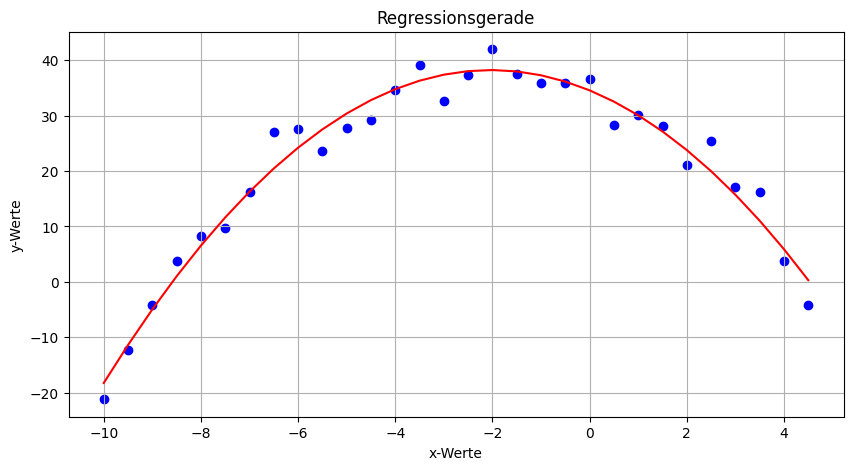

In [92]:
# Plot erstellen
plt.figure(figsize=(10,5))
plt.scatter(x, b, color="blue")
plt.plot(x, f(x), color="red")
plt.title("Regressionsgerade")
plt.xlabel("x-Werte")
plt.ylabel("y-Werte")
plt.grid(True)
plt.show()

## Ausblick

In dieser Minichallenge hast du die lineare Regression aus der Sicht der linearen Algebra als Projektionsproblem kennengelernt, das zu Normalengleichung geführt hat. In *Vertiefung der Analysis* lernst du, dass die gleiche Normalengleichung auch mit analytischer Minimierung des quadratischen Fehlers gefunden werden kann. Bei der Verwendung der Normalengleichung nimmst du also implizit an, dass du den quadratischen Fehler minimieren möchtest ("Least Squares"). Die stochastische Sicht lernst du in der Kompetenz *Lineare und Logistische Regression* kennen, dort wirst du sehen, dass du mit der Verwendung der Normalengleichung auch automatisch normalverteilte Fehler annimst!

Die lineare Regression ist eines der wesentlichen Instrumente von Machine Learning und viele Algorithmen basieren auf Erweiterungen davon. Insbesondere Deep Learning ist nichts anderes als eine Serie von Matrizenmultiplikationen gekoppelt mit nicht-linearen Aktivierungsfunktionen. Mit noch etwas multivariater Analysis bist du also bereit für neuronale Netze!